In [16]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [17]:
with open('/home/aka/Documents/DataWrangling/df_features_train_less.pickle', 'rb') as f:
    df_train3 = pickle.load(f)

df_train3.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_141-029-127,0,-319.767883,175.193329,40.833206,-10.359297,14.855524,29.182106,13.627123,3.084326,5.227895,...,0.097064,0.209291,0.838198,0.147599,0.034005,0.000000,0.000000,0.000000,0.000000,0.0
bass_synthetic_014-039-025,0,-471.937958,26.363501,7.603363,20.378784,6.733419,9.378804,2.576012,4.050887,-0.057741,...,0.409443,0.222885,0.074662,0.104696,0.136472,0.063833,0.164036,0.162534,0.041401,0.0
bass_synthetic_006-059-025,0,-396.165558,4.633788,-40.776646,31.319176,-17.912363,-5.913990,-22.681419,6.347715,-22.457975,...,0.440568,0.060193,0.041912,0.378121,0.029842,0.011735,0.018822,0.016354,0.599892,0.0
bass_synthetic_123-085-050,0,-523.812805,3.220716,-0.953415,-0.277554,-0.984078,0.864527,1.162921,0.802848,-0.486203,...,0.166108,0.155849,0.118775,0.107190,0.127987,0.131375,0.182440,0.129819,0.141098,0.0
bass_synthetic_021-037-127,1,-480.129883,45.193062,35.885624,31.641497,26.677032,22.510511,18.470043,15.656713,13.056710,...,0.040233,0.016616,0.017030,0.012453,0.009689,0.032490,0.029849,0.034381,0.114080,0.0


In [18]:
df_train3.shape

(9000, 177)

In [19]:
with open('/home/aka/Documents/DataWrangling/df_features_test_less.pickle', 'rb') as f:
    df_test3 = pickle.load(f)

df_test3.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_134-100-025,0,-517.346619,13.708894,10.092674,8.955691,6.571458,4.144460,3.624881,3.732304,1.712268,...,0.356320,0.342466,0.248693,0.185005,0.192230,0.203814,0.174023,0.083343,0.067454,0.0
bass_electronic_027-032-075,0,-451.734283,61.492455,55.462303,51.686192,45.300140,37.905334,31.920256,25.907938,20.389040,...,0.042230,0.022178,0.029148,0.074330,0.180533,0.841785,0.180857,0.050145,0.013716,0.0
bass_electronic_018-024-025,0,-521.028259,68.055008,59.094608,53.013004,47.434303,40.914829,35.002842,29.312483,23.804100,...,0.015076,0.047215,0.000000,0.005453,0.456481,0.009615,0.016131,0.033419,0.149838,0.0
bass_synthetic_134-037-075,0,-495.539642,60.034615,51.472553,40.982937,31.151451,22.924427,16.272430,10.921389,6.495123,...,0.104475,0.060713,0.093630,0.063012,0.067319,0.363459,0.076271,0.051961,0.031031,0.0
bass_synthetic_098-046-075,0,-459.243958,31.295605,23.048220,19.939980,19.143194,17.669800,16.442875,15.474045,14.461076,...,0.349200,0.247537,0.161175,0.072438,0.129550,0.096244,0.250677,0.417417,0.048640,0.0


In [24]:
# Applying the method
check_nan = df_train3.isnull().values.any()

# printing the result
print(check_nan)

False


In [21]:
df_test3.drop(df_test3[df_test3.isna().any(axis=1)].index, inplace=True)

In [22]:
df_train3.drop(df_train3[df_train3.isna().any(axis=1)].index, inplace=True)

In [25]:
#get training and testing data
X_train3 = df_train3.drop(labels=['targets'], axis=1)
y_train3 = df_train3['targets']

X_test3 = df_test3.drop(labels=['targets'], axis=1)
y_test3 = df_test3['targets']

# Naive Bayes

In [26]:
#instantiate the classifier
clf_NB3 = GaussianNB()

#fit to training data
clf_NB3.fit(X_train3, y_train3)

GaussianNB()

In [27]:
y_pred_NB3 = clf_NB3.predict(X_test3)

In [28]:
accuracy_NB3 = np.mean(y_pred_NB3 == y_test3)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB3))

The accuracy of Naive Bayes is 21.72%


In [29]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [30]:
class_names3=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ',
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.     0.025  0.     0.025  0.9    0.0125 0.025  0.0125]
 [0.     0.1125 0.0125 0.0375 0.375  0.0125 0.1125 0.3375]
 [0.05   0.1625 0.075  0.0125 0.475  0.075  0.1375 0.0125]
 [0.0125 0.1875 0.025  0.0125 0.7    0.     0.0625 0.    ]
 [0.     0.0625 0.     0.0375 0.8    0.     0.1    0.    ]
 [0.05   0.225  0.0875 0.     0.3625 0.125  0.0625 0.0875]
 [0.     0.0625 0.     0.     0.7375 0.     0.2    0.    ]
 [0.1125 0.075  0.175  0.0125 0.15   0.0375 0.025  0.4125]]


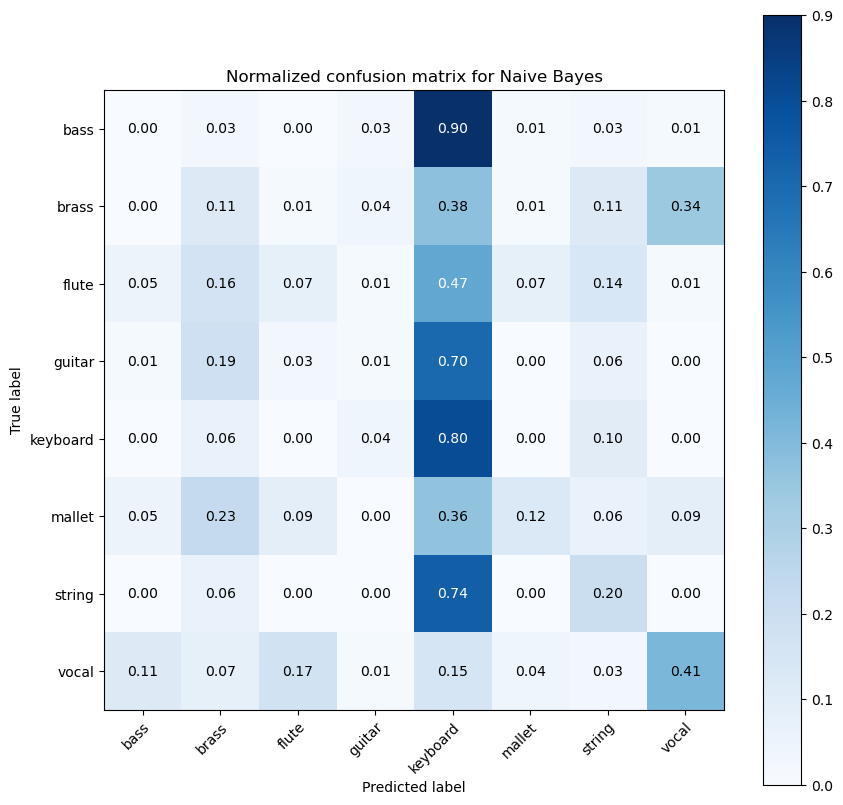

In [31]:
plot_confusion_matrix(y_test3, y_pred_NB3, classes=class_names3, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/NB_normalized_less.png')

# Random Forests

In [32]:
#instantiate the random forest
clf_Rf3 =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [33]:
clf_Rf3.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [34]:
y_pred_RF3 = clf_Rf3.predict(X_test3)

In [35]:
accuracy_RF3 = np.mean(y_pred_RF3 == y_test3)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF3))

The accuracy of Random Forest is 55.94%


Normalized confusion matrix
[[0.5    0.     0.     0.225  0.2125 0.0625 0.     0.    ]
 [0.05   0.55   0.025  0.0375 0.0125 0.     0.0625 0.2625]
 [0.0875 0.     0.775  0.0125 0.0375 0.0375 0.0125 0.0375]
 [0.2125 0.0125 0.025  0.5    0.2125 0.025  0.0125 0.    ]
 [0.2625 0.025  0.     0.275  0.3875 0.025  0.0125 0.0125]
 [0.075  0.0125 0.1    0.025  0.05   0.5125 0.1    0.125 ]
 [0.1375 0.05   0.     0.05   0.0375 0.0125 0.7125 0.    ]
 [0.2    0.05   0.0875 0.0875 0.0125 0.     0.025  0.5375]]


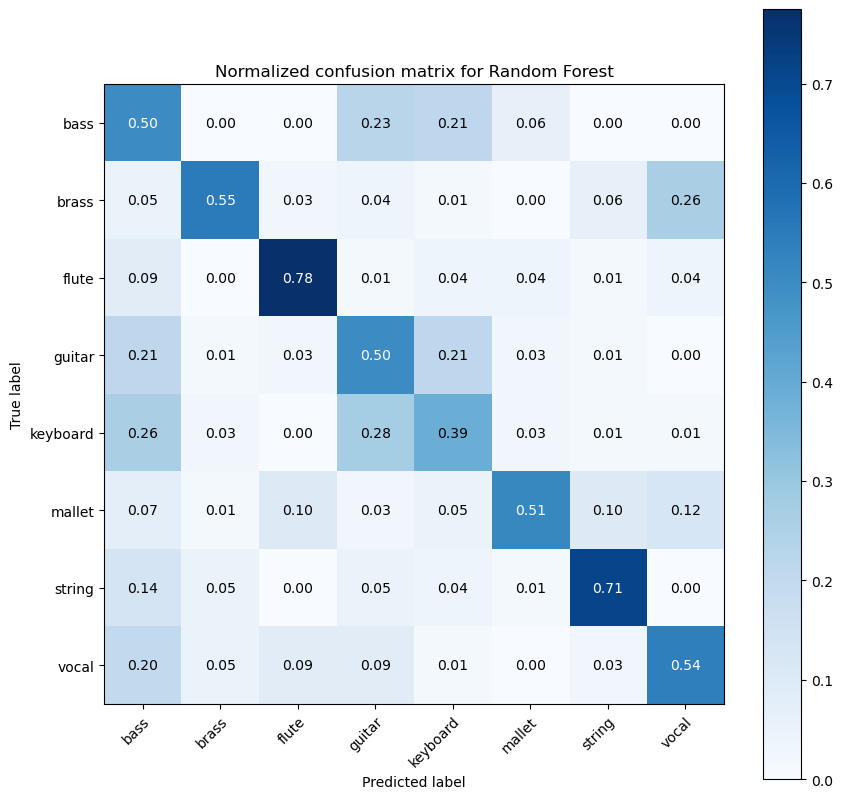

In [37]:
plot_confusion_matrix(y_test3, y_pred_RF3, classes=class_names3, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/RF_Normalized_less.png')

# SVM

In [49]:
#instantiate the sclaer
scaler3 = MinMaxScaler()

In [50]:
#scale the feature space
X_train_scale3 = scaler3.fit_transform(X_train3)
X_test_scale3 = scaler3.fit_transform(X_test3)

In [51]:
#instatiate the  classifier
clf_svm3 = SVC(C=0.1)

In [52]:
clf_svm3.fit(X_train_scale3, y_train3)

SVC(C=0.1)

In [55]:
y_pred_svm3 = clf_svm3.predict(X_test3)
accuracy_svm3 = np.mean(y_pred_svm3 == y_test3)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm3))

/home/aka/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 12.50%


In [56]:
#display non normalized confusion matrix
confusion_matrix(y_test3, y_pred_svm3)

array([[ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0,  0, 80]])

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


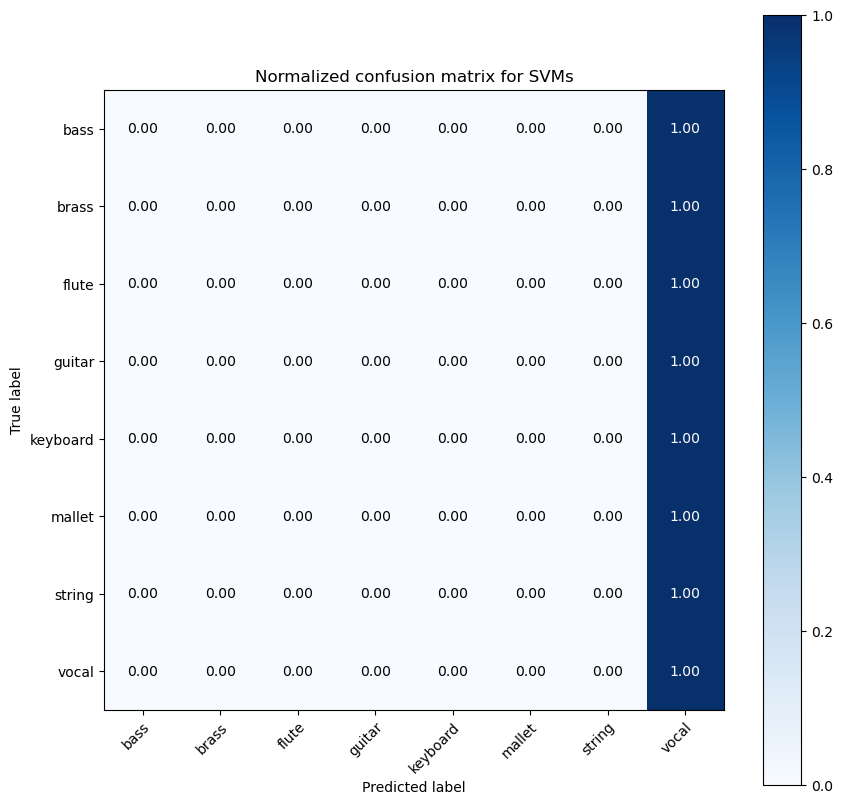

In [57]:
plot_confusion_matrix(y_test3, y_pred_svm3,classes=class_names3, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/SVM_Normalized_less.png')